# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #BA1141; text-align: center; line-height: 1.25;"><b>👨‍🎓 Indeks Pembangunan Manusia<span style="color: #000000"> 👩‍🎓 </span></b><br><span style="color: #FF5C8A; font-size: 24px">with 2 Machine Learning Models : Random Forest and Logistic Regression. </span></h1>
<hr>


##Identitas
- Nama : Faiqoh Rohadatul Aisy
- Kelas : Fibonacci
- Judul : Perbandingan Model Random Forest dengan Logistic Regression dalam  Memodelkan Faktor yang Mempengaruhi Indeks Pembangunan Manusia.

##Latar Belakang dan Rumusan Masalah

###Latar Belakang

Indeks Pembangunan Manusia (IPM) atau Human Development Index (HDI) adalah pengukuran perbandingan dari harapan hidup, melek huruf, pendidikan dan standar hidup. IPM menjelaskan bagaimana penduduk dapat mengakses hasil pembangunan dalam memperoleh pendapatan, kesehatan, pendidikan, dan sebagainya.

Manfaat IPM diantaranya :
1. IPM merupakan indikator penting untuk mengukur keberhasilan dalam upaya membangun kualitas hidup manusia (masyarakat/penduduk).
2. IPM dapat menentukan peringkat atau level pembangunan suatu wilayah/negara.
3. Bagi Indonesia, IPM merupakan data strategis karena selain sebagai ukuran kinerja Pemerintah, IPM juga digunakan sebagai salah satu alokator penentuan Dana Alokasi Umum (DAU).

Oleh karena itu program ini akan memilih model mana yang terbaik untuk memodelkan IPM.

###Rumusan Masalah :

1. Bagaimana kategori Very High, High, Normal dan Low pada IPM dibagi?
2. Manakah model terbaik untuk memodelkan IPM?
3. Dari hasil perbandingan, berapakah akurasi untuk model terbaik?


##Data dan variabel data

Data yang digunakan merupakan dataset IPM.csv yang berasal dari LMS orbitguru. Pada data ini terdapat beberapa variabel, dimana variabel independennya adalah Harapan Lama Sekolah, Pengeluaran Perkapita, Rerata Lama Sekolah, Usia Harapan Hidup dan variabel dependennya adalah IPM.



##Preprocessing Data
Menampilkan :
- preparation
- missing value check
- tipe data
- data visualisasi

In [ ]:
#---Import Library---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap


In [ ]:
# --- Importing Dataset ---
df = pd.read_csv("IPM.csv")
df


,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [ ]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('=' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'=' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('=' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
Total Rows: 2196
Total Columns: 5


.: Dataset Details :.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)

###Visualisasi Data

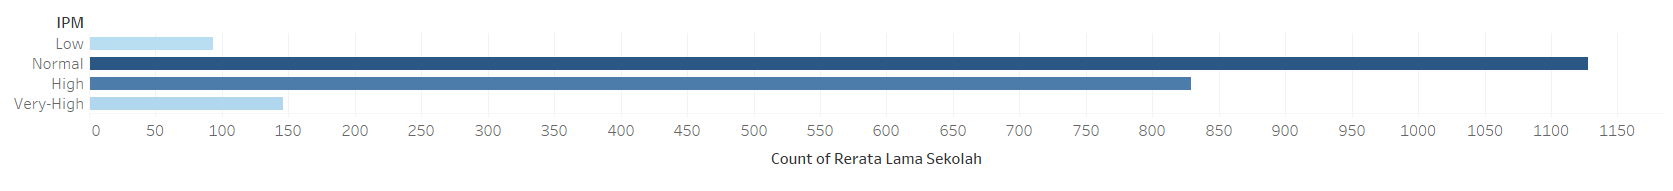

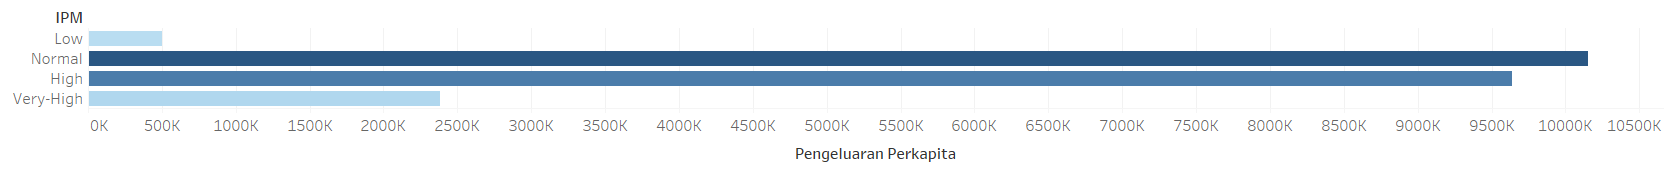

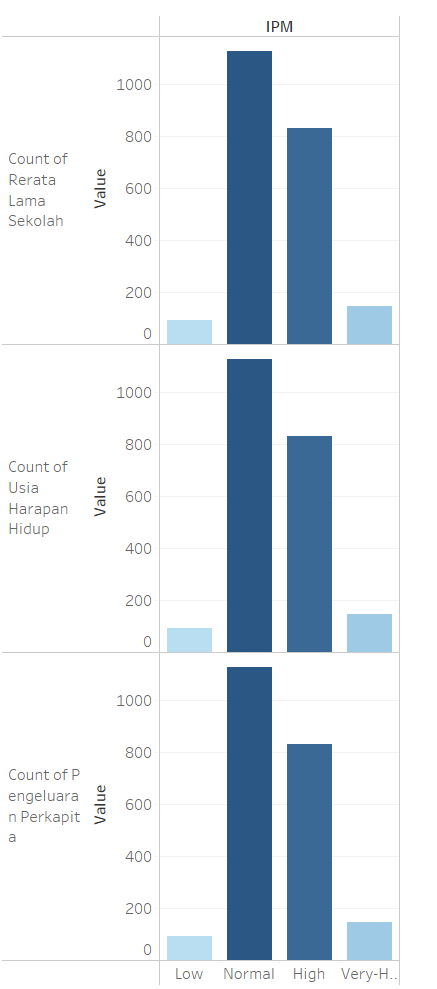

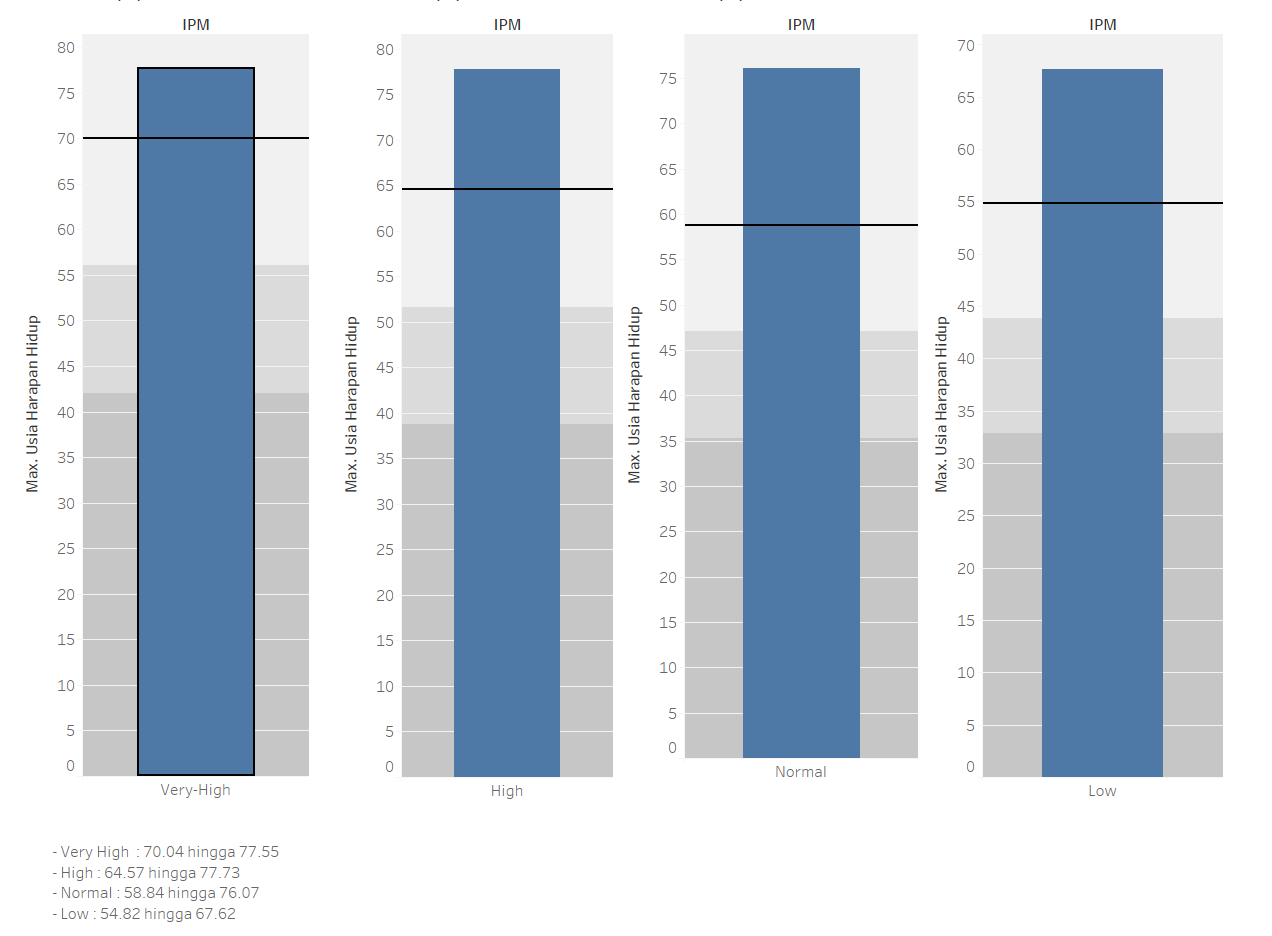

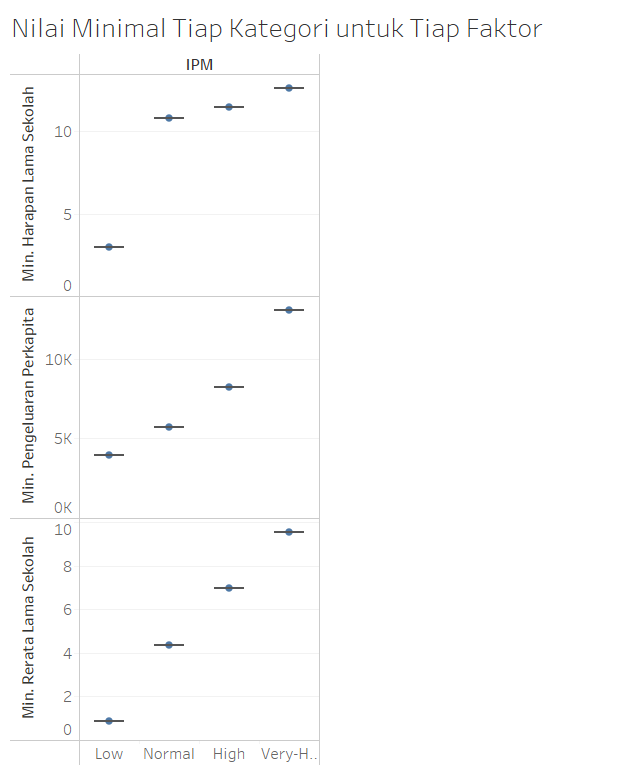

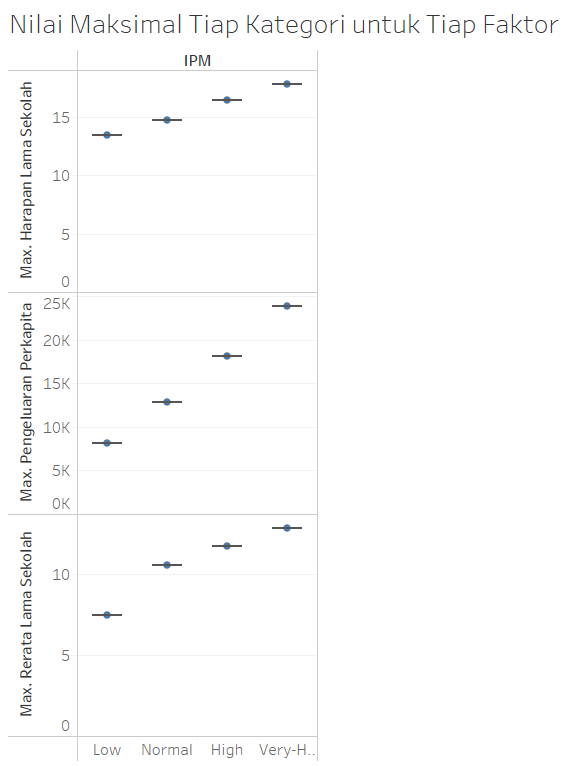

##Modelling

###🌳Random Forest🌲

Random Forest adalah salah satu metode ensemble yang sering memberikan hasil yang baik dalam klasifikasi dan regresi. Cara kerja dari Random Forest adalah dengan membangun pohon yang nantinya akan dilakukan pengulangan sebanyak k pohon. Pohon-pohon tersebut akan digabungkan sebagai dasar dalam melakukan estimasi.

In [ ]:
# --- Seperating Dependent Features ---
x = df.drop(['IPM'], axis=1)
y = df['IPM']

# --- Splitting Dataset into 75:25 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [ ]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=100, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 93.99% .:.

.: Classification Report
              precision    recall  f1-score   support

        High       0.94      0.91      0.93       204
         Low       0.96      0.89      0.92        27
      Normal       0.93      0.98      0.96       277
   Very-High       0.94      0.83      0.88        41

    accuracy                           0.94       549
   macro avg       0.95      0.90      0.92       549
weighted avg       0.94      0.94      0.94       549


.: Performance Evaluation


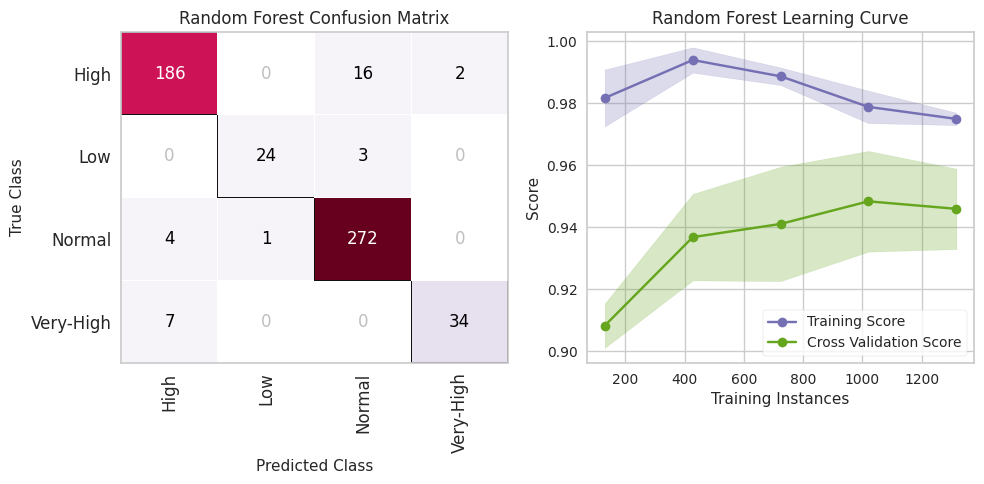

In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('=' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('=' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax2, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

plt.tight_layout();

###🚧Logistic Regression🌫

Logistic Regression adalah metode statistik yang digunakan untuk membangun model dimana variabel dependennya adalah dikotomis: yaitu biner. Regresi logistik digunakan untuk menggambarkan data dan hubungan antara satu variabel terikat dengan satu atau lebih variabel bebas. Variabel bebas dapat berupa nominal, ordinal, atau tipe interval.


In [ ]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1000, random_state=1)#, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 76.50% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

        High       0.71      0.73      0.72       204
         Low       0.94      0.59      0.73        27
      Normal       0.79      0.84      0.81       277
   Very-High       0.82      0.56      0.67        41

    accuracy                           0.77       549
   macro avg       0.82      0.68      0.73       549
weighted avg       0.77      0.77      0.76       549


.: Performance Evaluation
**************************


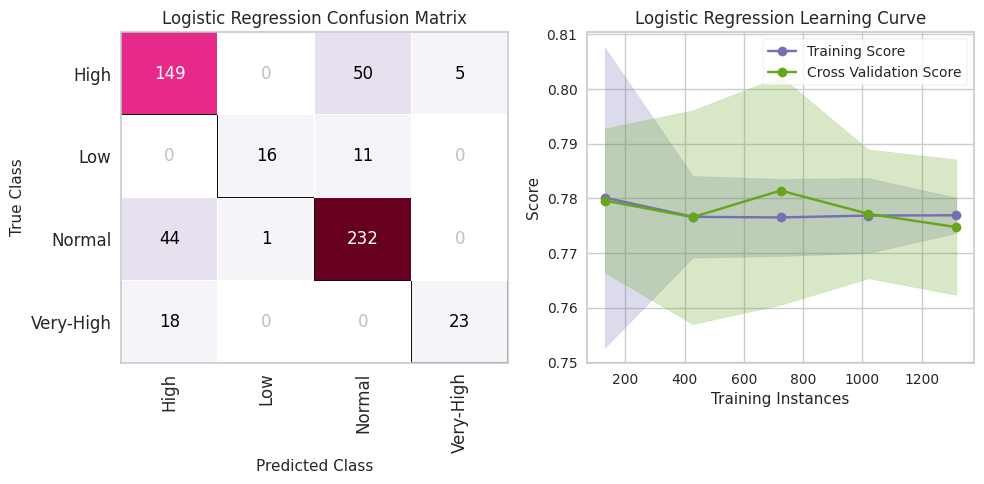

In [ ]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax2, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

plt.tight_layout();

##Hasil Perbandingan

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest'],
                        'Accuracy': [LRAcc*100, RFAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Random Forest,93.989071
0,Logistic Regression,76.502732


##Kesimpulan

Berdasarkan dataset yang tercantum, kondisi IPM untuk tiap kategori memiliki beberapa syarat, sebagai berikut :
1. Very High

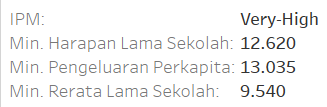

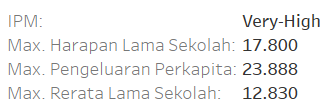


2. High

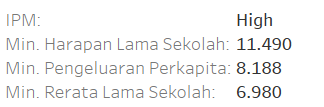

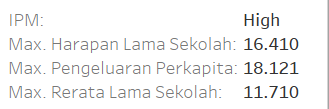


3. Normal

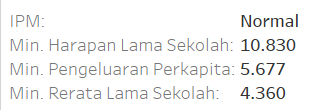

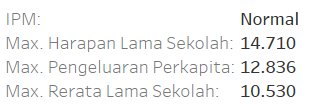

4. Low

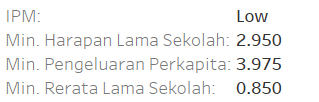


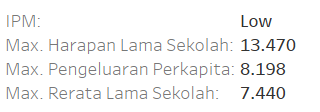

Dari hasil perbandingan model dan keseluruhan program, maka dapat disimpulkan bahwa model terbaik adalah Random Forest dengan tingkat akurasi sebesar 93,98.